# **Explanation Of The Logistical Regression:**
Dataset has categorical values which are encoded as numbers based on their label and than counted.
We use the newly formed value based dataset to do the Logistical Regression and at the end we get a accuracy percentage, meaning how much we can predict the MENTAL_HEALTH_CONDITION of a worker, based on their
*   Age
*   Stress_Level
*   Social_Isolation_Rating
*   Number_of_Virtual_Meetings
*   Work_Life_Balance_Rating
*   Productivity_Change



In [7]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# **UPLOAD DATA ON GOOGLE COLAB:**
Save both datasets as CSV files (employee_data.csv and questionnaire_data.csv) and upload them.

In [3]:
from google.colab import files
import pandas as pd

# Upload datasets
uploaded = files.upload()

# Load the datasets
employee_data = pd.read_csv('employee_data.csv')
questionnaire_data = pd.read_csv('questionnaire_data.csv')

# Display first few rows
print("Employee Data:")
print(employee_data.head())
print("\nQuestionnaire Data:")
print(questionnaire_data.head())


Saving employee_data.csv to employee_data.csv
Saving questionnaire_data.csv to questionnaire_data.csv
Employee Data:
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7            

# **Inspect and Clean the Employee Dataset**

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Assuming employee_data is your DataFrame
# Drop the 'Employee_ID' column if it exists
employee_data = employee_data.drop(columns=['Employee_ID'], errors='ignore')

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_columns = employee_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    employee_data[col].fillna(employee_data[col].mode()[0], inplace=True)

# Label encode the target variable (Mental_Health_Condition)
le = LabelEncoder()
employee_data['Mental_Health_Condition'] = le.fit_transform(employee_data['Mental_Health_Condition'])

# One-hot encode categorical features
employee_data = pd.get_dummies(employee_data, drop_first=True)

# Check the processed data
print(employee_data.head())




   Age  Years_of_Experience  Hours_Worked_Per_Week  \
0   32                   13                     47   
1   40                    3                     52   
2   59                   22                     46   
3   27                   20                     32   
4   49                   32                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
0                           7                         2   
1                           4                         1   
2                          11                         5   
3                           8                         4   
4                          12                         2   

   Mental_Health_Condition  Social_Isolation_Rating  \
0                        2                        1   
1                        0                        3   
2                        0                        4   
3                        2                        3   
4                        1                   

# **Train-Test Split**
Split data into training and testing sets:

In [9]:
# Split the data into features and target
X = employee_data.drop(columns=['Mental_Health_Condition'])
y = employee_data['Mental_Health_Condition']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing data
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check class distribution
print(f'Class distribution in training set:\n{y_train.value_counts()}')


Training set size: (3500, 39)
Testing set size: (1500, 39)
Class distribution in training set:
Mental_Health_Condition
1    1753
0     882
2     865
Name: count, dtype: int64


# **Logistic Regression**
Train the logistic regression model:


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Apply SMOTE if there are imbalanced classes
if y_train.value_counts().min() < 10:  # Example condition for applying SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f'Class distribution after SMOTE:\n{y_train_resampled.value_counts()}')
    # Use resampled data for training
    X_train, y_train = X_train_resampled, y_train_resampled
else:
    print("No need for SMOTE as the dataset contains balanced classes.")



# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=5000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


No need for SMOTE as the dataset contains balanced classes.
Accuracy: 0.4826666666666667


# **Confusion Matrix: What is predicted accurately the most**

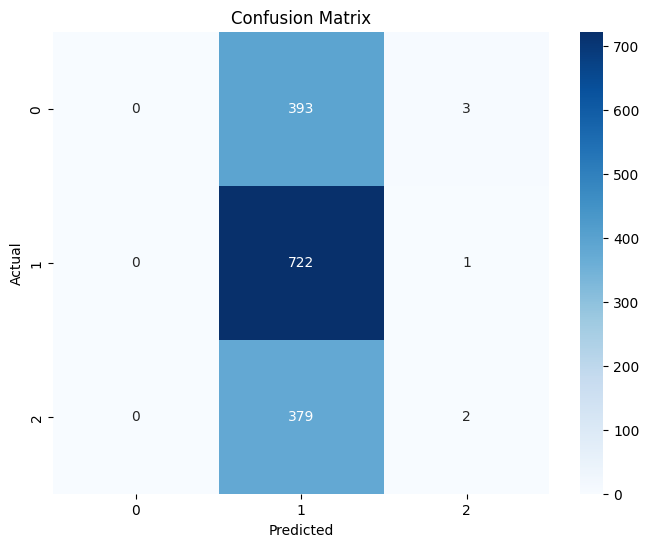

In [11]:
# Assuming you have already split the data into X_train, X_test, y_train, y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Logistic Regression Coefficients: **Which Features(values) affect Mental Condition the most**
The graph helps you understand how each feature affects the model's prediction of mental health conditions, allowing you to interpret the logistic regression model in terms of which factors (like stress level, social isolation, etc.) are most important in predicting the target (mental health condition).

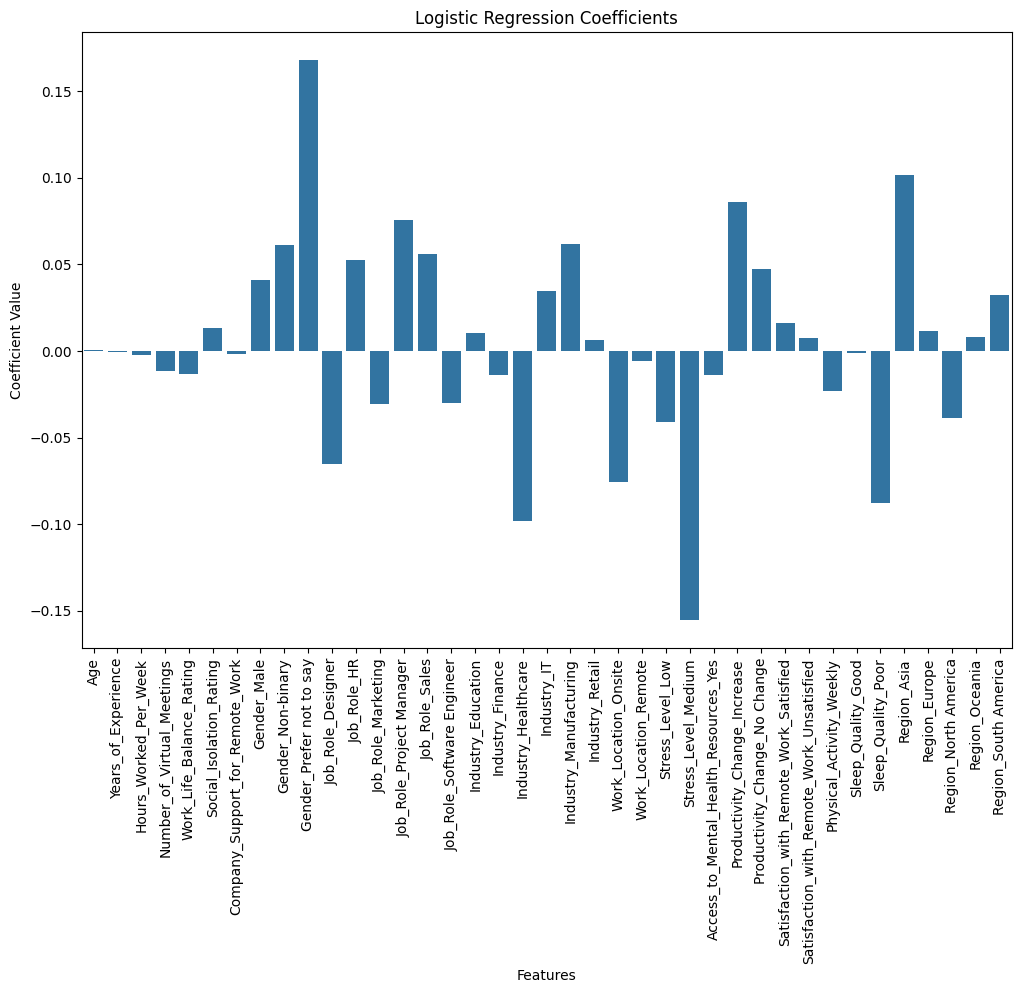

In [12]:
# Get the coefficients of the logistic regression model
coefficients = log_reg.coef_

# Visualize the coefficients for each feature
plt.figure(figsize=(12, 8))
features = X.columns
sns.barplot(x=features, y=coefficients[0])
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()




<ipython-input-22-53b18de85e5c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=employee_data, x='Stress_Level_Low', y='Mental_Health_Condition', palette='coolwarm')


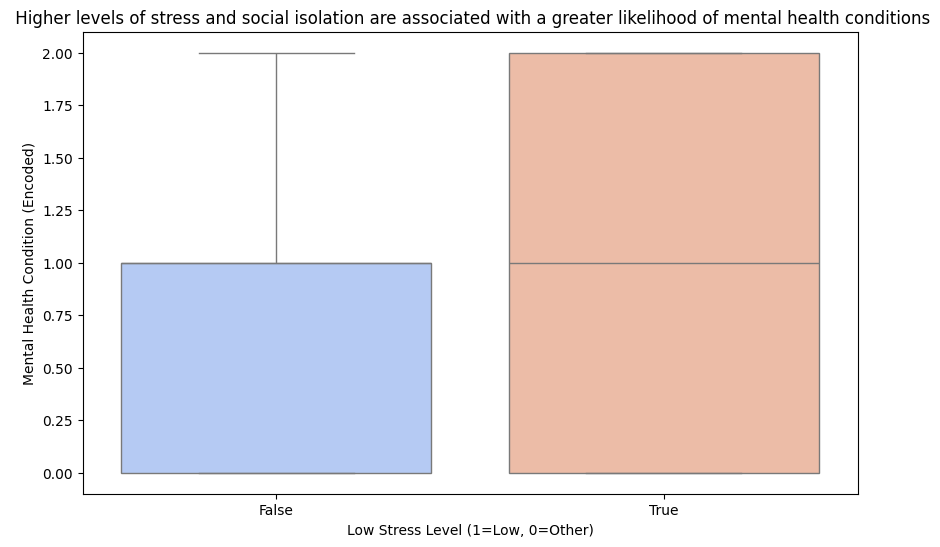

<ipython-input-22-53b18de85e5c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=employee_data, x='Satisfaction_with_Remote_Work_Satisfied', y='Mental_Health_Condition', palette='coolwarm')


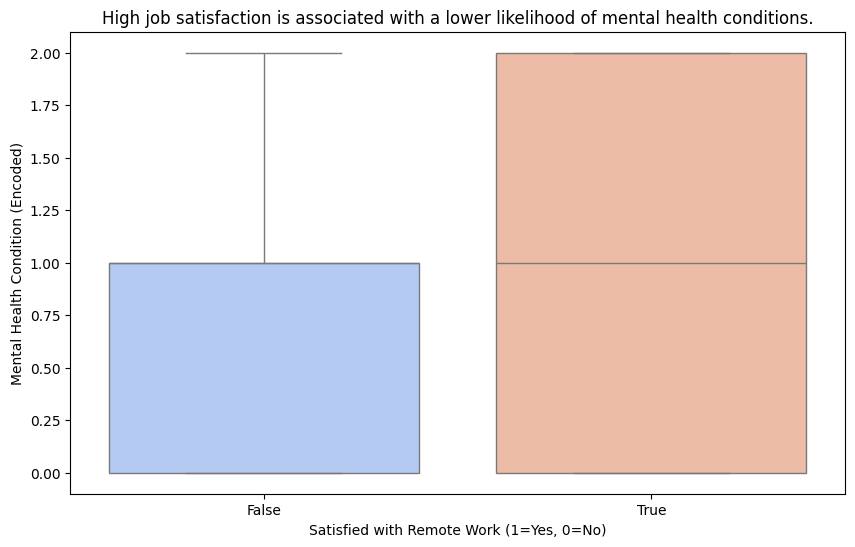

<ipython-input-22-53b18de85e5c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=employee_data, x='Work_Location_Onsite', y='Mental_Health_Condition', palette='coolwarm')


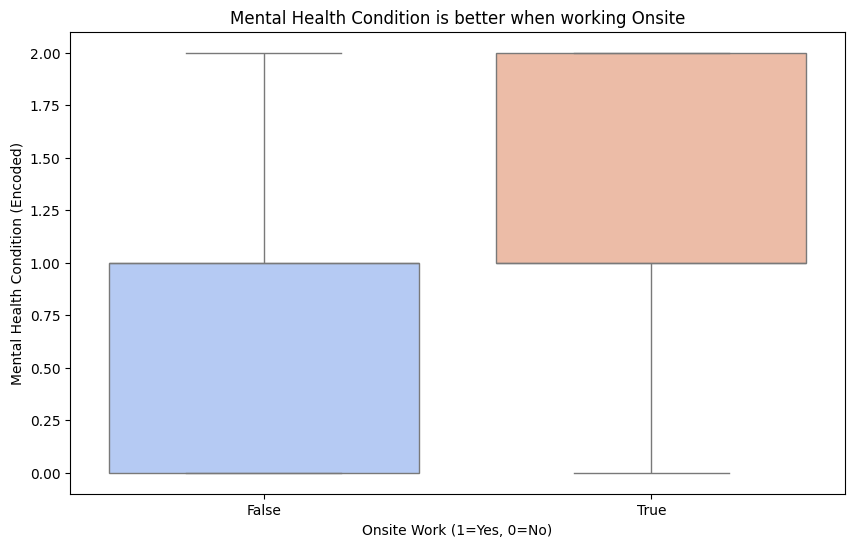

<ipython-input-22-53b18de85e5c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=employee_data, x='Work_Location_Remote', y='Mental_Health_Condition', palette='coolwarm')


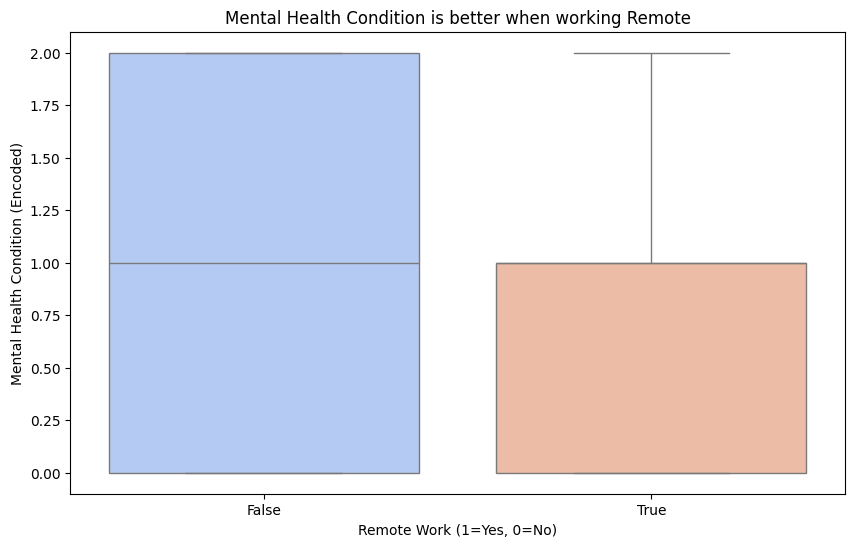

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Higher levels of stress and social isolation are associated with a greater likelihood of mental health conditions.
plt.figure(figsize=(10, 6))
sns.boxplot(data=employee_data, x='Stress_Level_Low', y='Mental_Health_Condition', palette='coolwarm')
plt.title(' Higher levels of stress and social isolation are associated with a greater likelihood of mental health conditions')
plt.xlabel('Low Stress Level (1=Low, 0=Other)')
plt.ylabel('Mental Health Condition (Encoded)')
plt.show()


# 2. High job satisfaction is associated with a lower likelihood of mental health conditions.
plt.figure(figsize=(10, 6))
sns.boxplot(data=employee_data, x='Satisfaction_with_Remote_Work_Satisfied', y='Mental_Health_Condition', palette='coolwarm')
plt.title('High job satisfaction is associated with a lower likelihood of mental health conditions.')
plt.xlabel('Satisfied with Remote Work (1=Yes, 0=No)')
plt.ylabel('Mental Health Condition (Encoded)')
plt.show()



# 4. Hybrid work arrangements may contribute to better mental health and higher job satisfaction.
plt.figure(figsize=(10, 6))
sns.boxplot(data=employee_data, x='Work_Location_Onsite', y='Mental_Health_Condition', palette='coolwarm')
plt.title('Mental Health Condition is better when working Onsite')
plt.xlabel('Onsite Work (1=Yes, 0=No)')
plt.ylabel('Mental Health Condition (Encoded)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=employee_data, x='Work_Location_Remote', y='Mental_Health_Condition', palette='coolwarm')
plt.title('Mental Health Condition is better when working Remote')
plt.xlabel('Remote Work (1=Yes, 0=No)')
plt.ylabel('Mental Health Condition (Encoded)')
plt.show()
